In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Categorical scatterplots:
1. stripplot() (with kind="strip"; the default)
2. swarmplot() (with kind="swarm")

## Categorical distribution plots:
1. boxplot() (with kind="box")
2. violinplot() (with kind="violin")
3. boxenplot() (with kind="boxen")

## Categorical estimate plots:
1. pointplot() (with kind="point")
2. barplot() (with kind="bar")
3. countplot() (with kind="count")


#### We can also use stripplot(), swarmplot(), boxplot(), violinplot(), boxenplot(), pointplot(), barplot(), countplot()

In [5]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


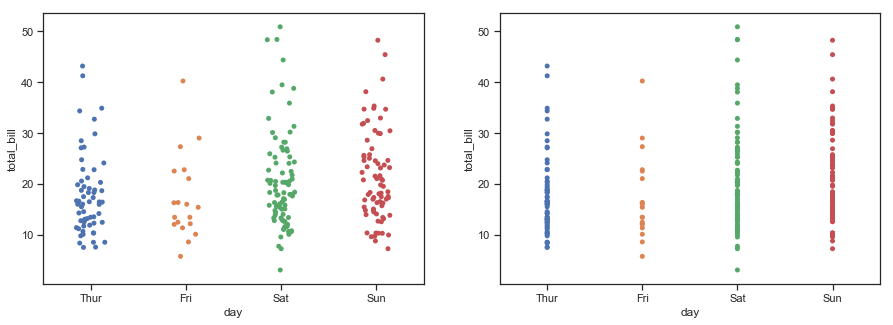

In [24]:
"""
x,y data col
data = dataframe
kind = kind of plot("point", "bar", "strip", "swarm","box", "violin", or "boxen")
jitter = controls the magnitude of jitter or disables(False) it altogether

"""
fig,ax = plt.subplots(figsize=(15,5),ncols=2,nrows=1)
#strip is just like a scatter plot
sns.catplot(x="day", y="total_bill", data=tips, kind="strip",jitter=0.15,ax=ax[0]);
plt.clf()

#setting jitter false
sns.catplot(x="day", y="total_bill", data=tips, kind="strip",jitter=False,ax=ax[1]);
plt.clf()

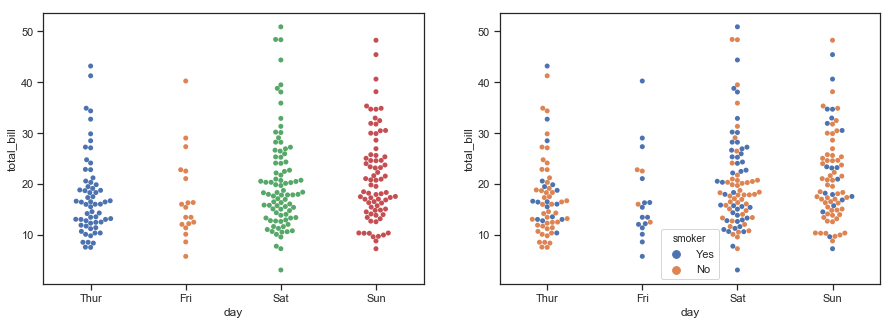

In [32]:
fig,ax = plt.subplots(figsize=(15,5),ncols=2,nrows=1)

#second approach adjusts the points along the categorical axis 
#swarm uses an algorithm that prevents them from overlapping.
#it only works well for relatively small datasets.
sns.catplot(x="day", y="total_bill", data=tips, kind="swarm",ax=ax[0]);
plt.clf()

#grouping with hue
sns.catplot(x="day", y="total_bill", data=tips, kind="swarm",hue="smoker",ax=ax[1]);
plt.clf()

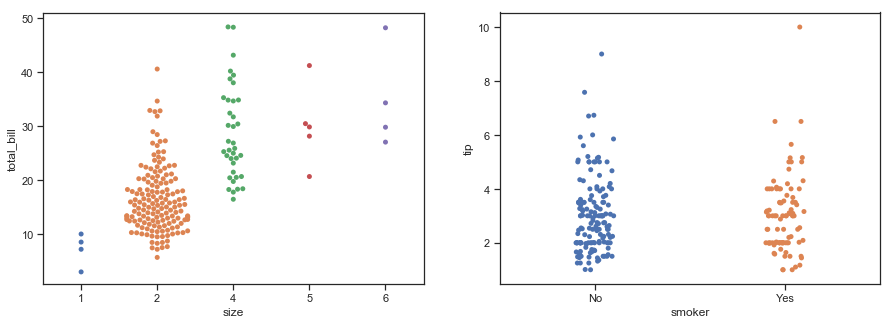

In [27]:
"""
Seaborn catplot try to inder order of variables
or you can assign it to
"""
fig,ax = plt.subplots(figsize=(15,5),ncols=2,nrows=1)
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"),ax=ax[0]);
plt.clf()

sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips,ax=ax[1]);
plt.clf()

In [29]:
"""
As size of dataset increases it becomes difficult to visualize using scatter plot
so distribution of data can be helpful
several approaches for summarizing the distributional information(boxplot,violinplot,boxenplot)
"""

'\nAs size of dataset increases it becomes difficult to visualize using scatter plot\nso distribution of data can be helpful\nseveral approaches for summarizing the distributional information(boxplot,violinplot,boxenplot)\n'

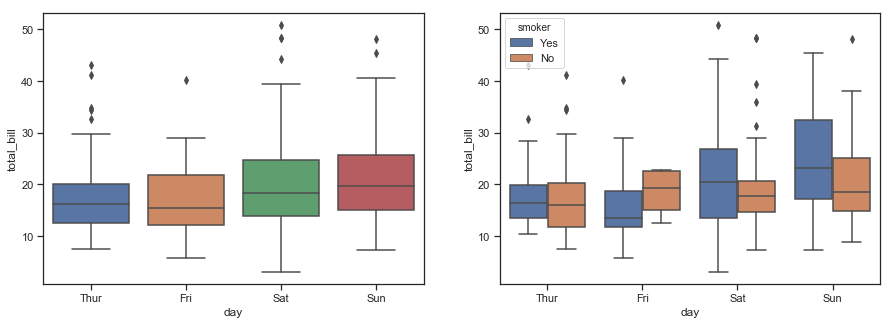

In [39]:
"""
Box Plot- this is very familiar
This kind of plot shows the three quartile values of the distribution along with extreme values.

                   Q1_________Q3
                     |   |   |
           |---------|   |   |---------|  
        Q1-1.5*IQR   |   |   |      Q3+1.5*IQR
                     ----M----

        M= median
        Q1 = median of 1st half entries
        Q3 = median of (2nd half) largest half entries
        IQR = Q3-Q1

1. The larger the box the higher the data is distributed
"""
fig,ax = plt.subplots(figsize=(15,5),ncols=2,nrows=1)

sns.catplot(x="day", y="total_bill", kind="box", data=tips,ax=ax[0]);
plt.clf()

#the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap
#the non overlapping feature is called dodging, we can also turn it off
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips,ax=ax[1]);
plt.clf()

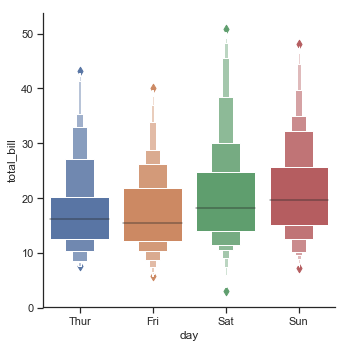

In [43]:
"""
Boxenplot
Boxenplot draws a plot that is similar to a box plot 
but optimized for showing more information about the shape of the distribution.
It is best suited for larger datasets.
"""
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);

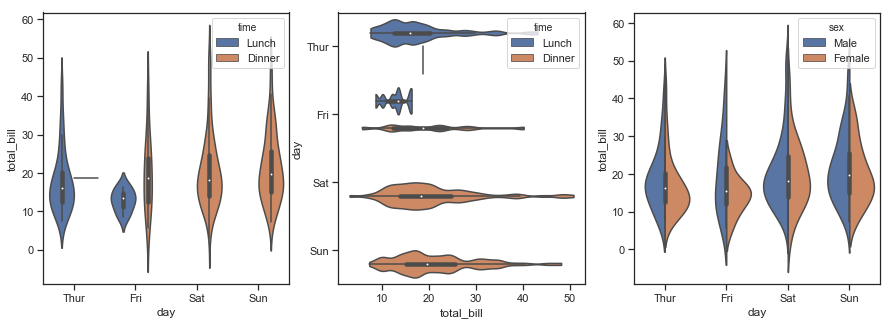

In [55]:
"""
Violinplot
A different approach is a violinplot(), 
which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial.

Additionally, the quartile and whikser values from the boxplot are shown inside the violin
"""
fig,ax = plt.subplots(figsize=(15,5),ncols=3,nrows=1)

sns.catplot(x="day", y="total_bill", hue="time",
            kind="violin", data=tips,ax=ax[0]);
plt.clf()

#there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips,ax=ax[1]);
plt.clf()

#It’s also possible to “split” the violins when the hue parameter has only two levels,
#which can allow for a more efficient use of space:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips,ax=ax[2]);
plt.clf()

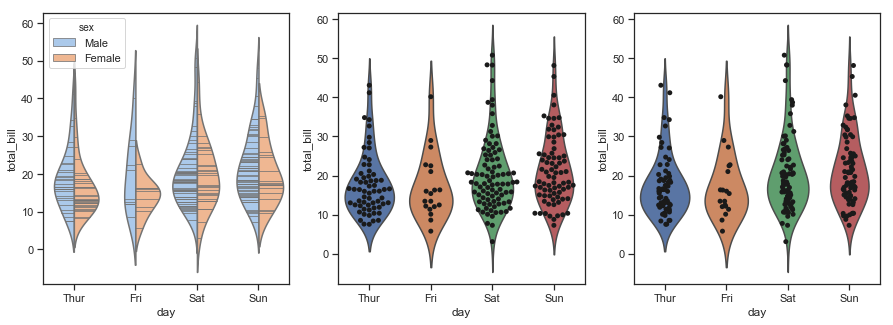

In [64]:
#Finally, there are several options for the plot that is drawn on the interior of the violins, 
#including ways to show each individual observation instead of the summary boxplot values
fig,ax = plt.subplots(figsize=(15,5),ncols=3,nrows=1)
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", inner="stick", split=True,
            palette="pastel", data=tips,ax=ax[0]);
plt.clf()

#It can also be useful to combine swarmplot or striplot with a box plot or violin plot to show each observation
sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips,ax=ax[1])
sns.swarmplot(x="day", y="total_bill", color="k", data=tips, ax=ax[1]);
plt.clf()

sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips,ax=ax[2])
sns.stripplot(x="day", y="total_bill", color="k", data=tips, ax=ax[2]);
plt.clf()

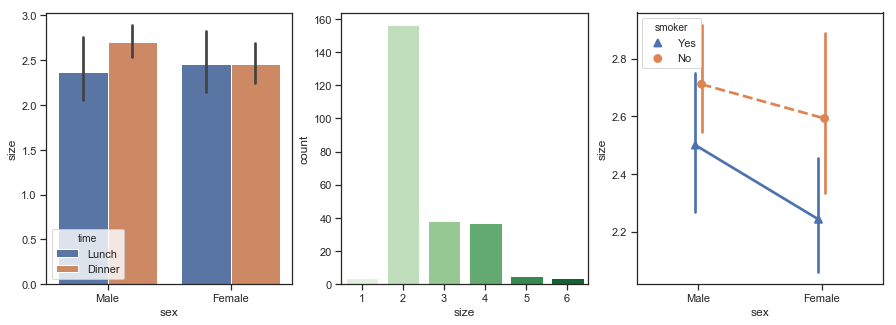

In [95]:
"""
Statistical estimation within categories
showing the distribution within each category, 
"""
fig,ax = plt.subplots(figsize=(15,5),ncols=3,nrows=1)
#you might want to show an estimate of the central tendency of the values
sns.catplot(x="sex", y="size", hue="time", kind="bar", data=tips,ax=ax[0]);
plt.clf()

#A special case for the bar plot is when you want to show the number of observations 
#in each category rather than computing a statistic for a second variable
sns.catplot(x="size", kind="count",palette="Greens", data=tips,ax=ax[1]);
plt.clf()

sns.catplot(x="sex", y="size",hue="smoker", kind="point",
            markers=["^", "o"], linestyles=["-", "--"],
            dodge=True, data=tips,ax=ax[2]);
plt.clf()

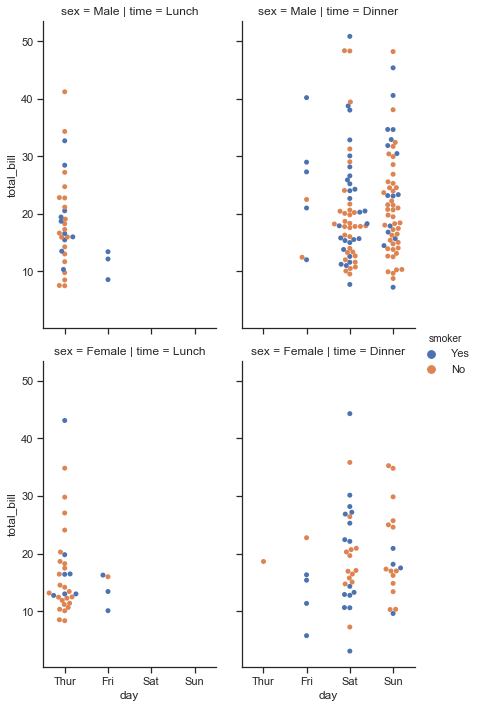

In [102]:
"""
Showing multiple relationships with facets
"""
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time",row='sex', aspect=.6,
            kind="swarm", data=tips);